## Last Modification: 15/12/2023

In [3]:
import os
os.getcwd()
seed = 19594
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

random.seed(seed)     # python random generator
np.random.seed(seed) 
from utils.utils_semi import *
path = r'C:\Users\kmorales\Downloads\1070db.tar\pgms'
path_data = r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Data'
# os.listdir(path)

'c:\\Users\\kmorales\\Google Drive\\PhD\\Simulations_semi_super'

0.59686279296875


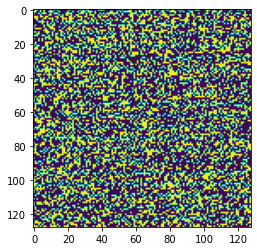

In [8]:
# create an example image
size = 128
image = np.zeros((size, size))
# create a random binary mask with a 50% missing value rate
missing_percent = 60
# missing_mask = np.random.choice([0, 1], size=image.shape,
#                                 p=[missing_percent/100, 1-(missing_percent/100)])
# missing_mask = np.random.choice([0, 1], size=image.shape,
#                                 p=[missing_percent/100, 1-(missing_percent/100)])
missing_mask = np.random.binomial(1, 1-missing_percent/100, size=(size, size))
plt.imshow(missing_mask)
print(np.sum(missing_mask==0)/size**2)
# np.save('mask_2blocks_128_60.npy', missing_mask)

0.60552978515625


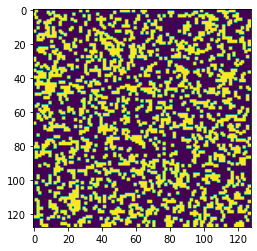

In [397]:
# size = 128
# mask = np.zeros((size, size))

# # Randomly select a set of pixels to mask
# for i in range(2500):
#      # value = np.random.randint(0, size//3)
#      x = np.random.randint(0, size)
#      y = np.random.randint(0, size)
#      w = np.random.randint(size//8, size//3)
#      h = np.random.randint(size//8, size//3)
#      mask[x-w//20:x+w//20, y-h//20:y+h//20] = 1
#      plt.imshow(mask)
# print(np.sum(mask==0)/size**2)

In [398]:

# print(np.sum(mask==0)/size**2)
# plt.imshow(mask)
# np.save('mask_2blocks_128_50.npy', mask)

0.60015869140625


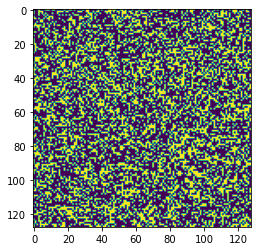

In [4]:
# Mask for 128 size
mask = np.load('mask_2blocks_128_60.npy')  #! 60% observed
# mask = np.load('mask_2blocks_128_55.npy') #! 55% observed
# mask = np.load('mask_2blocks_128_50.npy') #! 50% observed
print(np.sum(mask==0)/mask.size)
plt.imshow(mask)
# Mask for 256 size
# mask = np.load('mask_2blocks.npy')
# print(np.sum(mask==0)/mask.size)
# # plt.imshow(mask)

carriage multi_noise:  True
sigma:  0.2
mu 0.1


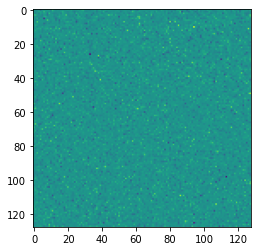

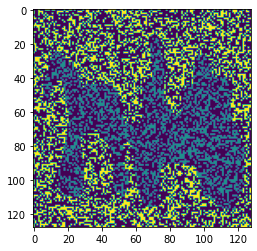

mu 0.2


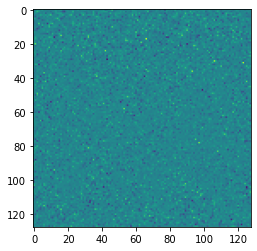

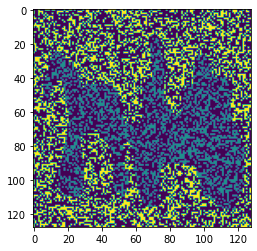

mu 0.3


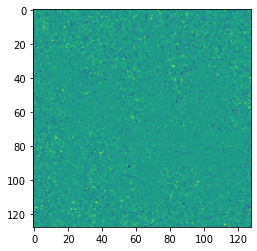

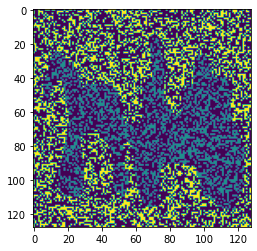

mu 0.4


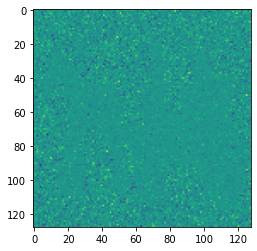

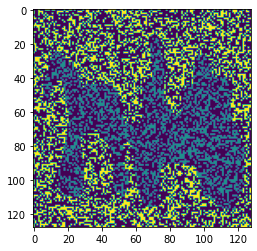

mu 0.5


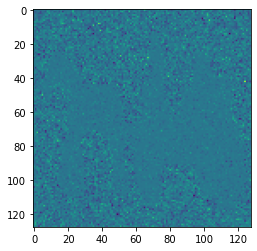

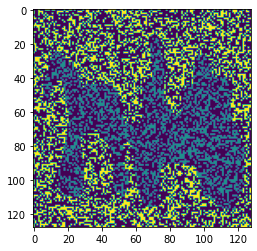

mu 0.6


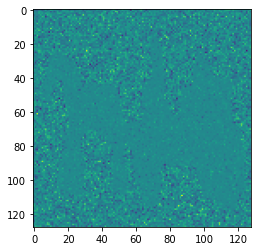

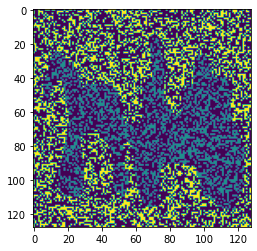

mu 0.7


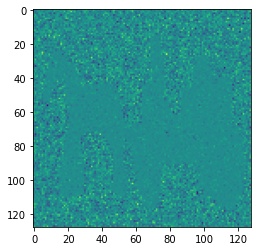

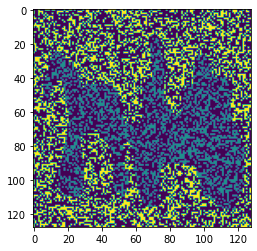

mu 0.8


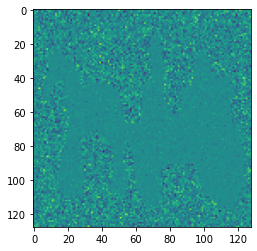

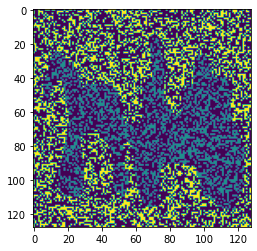

mu 0.9


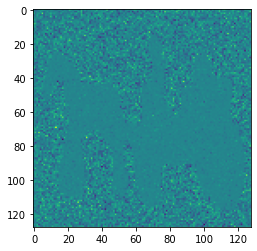

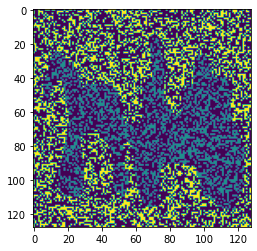

mu 0.1


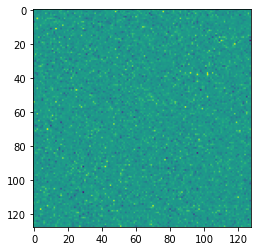

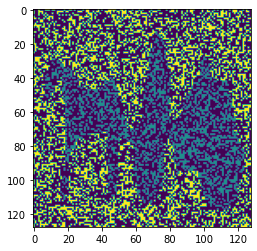

mu 0.2


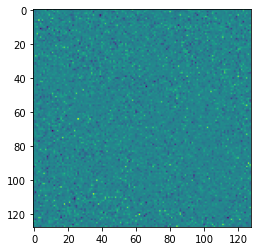

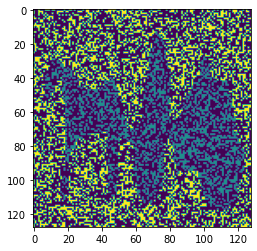

mu 0.3


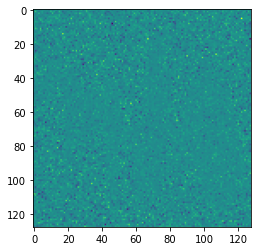

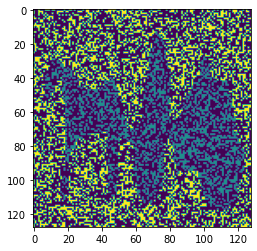

mu 0.4


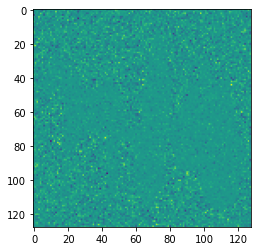

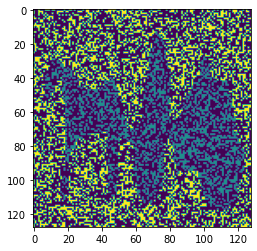

mu 0.5


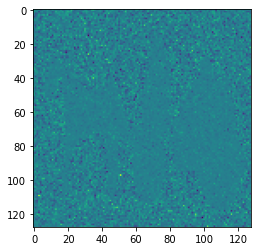

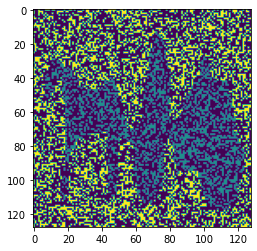

mu 0.6


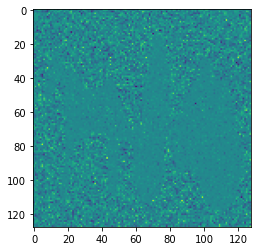

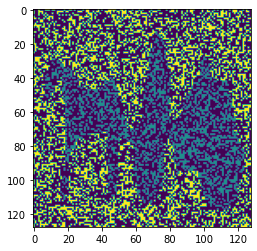

mu 0.7


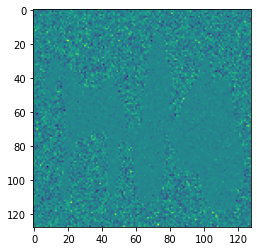

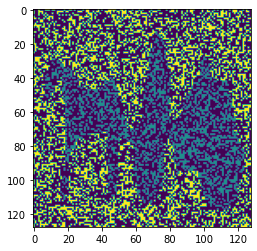

mu 0.8


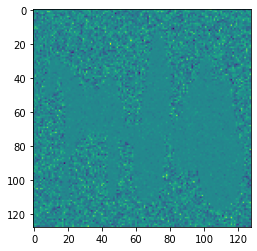

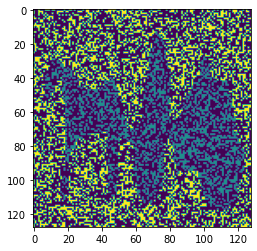

mu 0.9


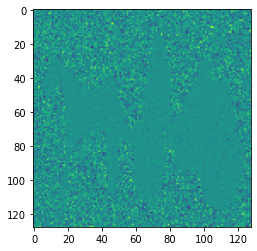

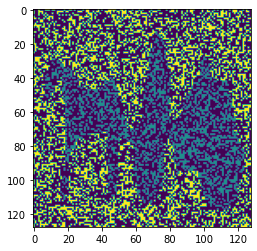

In [5]:
# # Last modification: 2023-12-13
type_image = 'carriage'
p = 60
labeled = str(p)
multi_noise =  True # #! True for multiplicative noise and False for additive noise
print(type_image,'multi_noise: ', multi_noise)

# carriage multiplicative noise
# cat additive noise
size = 128
print_images = True
path_save = os.path.join(path_data, type_image+'_'+labeled)
os.makedirs(path_save, exist_ok=True)
#* Create the images, fixed mu and sigma
mu_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# mu_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sigma_general = 0.5
sigma_multi = 0.2
sigma  = sigma_general if not multi_noise else sigma_multi
print('sigma: ', sigma)

for i, image in enumerate(os.listdir(path)):
     if image.startswith(type_image):
               image_file = os.path.join(path, image)
               for mu in mu_list:
                    image_x, image_y = generate_noisy_image(image_file, size, mu, sigma, multi_noise)
                    # print(np.unique(image_y), image_y.dtype)
                    mask = np.random.binomial(1, 1-p/100, size=(size, size))
                    label_miss = image_y.copy().astype('float64')
                    label_miss[mask == 0] = -1   
                    if i%10 == 0 and print_images:
                         print('mu', mu)
                         plt.imshow(image_x)
                         plt.show()
                         plt.imshow(label_miss)
                         plt.show()
                         # plt.hist(image_x.flatten())
                         # plt.show() 
                    np.save(os.path.join(path_save,f'{image[:-4]}_{str(int(mu*10))}.npy'), 
                            [image_x, image_y.astype('float64'), label_miss ])
               # print(np.unique(label_miss, return_counts=True))

In [ ]:
# Date: Last modified on 2021/05/10 for MLSP paper
#  type_image = 'camel' # 'camel'
# size = 256
# print_images = True
# path_save = os.path.join(path_data, type_image+'_'+str(size))
# #* Create the images, fixed mu and sigma
# os.makedirs(path_save, exist_ok=True)
# multi_noise =  True if type_image == 'camel' else False #! True for multiplicative noise and False for additive noise
# print(type_image,'multi_noise: ', multi_noise)
# mu_general = 0.4
# mu_multi = 0.5
# mu = mu_general if not multi_noise else mu_multi
# sigma_general = 0.5
# sigma_multi = 0.2
# sigma  = sigma_general if not multi_noise else sigma_multi
# print('mu: ', mu, 'sigma: ', sigma)

# for image in os.listdir(path):
#      if image.startswith(type_image):
#           image_file = os.path.join(path, image)
#           print(image)
#           image_x, image_y = generate_noisy_image(image_file, size, mu, sigma, multi_noise)
#           print(np.unique(image_y), image_y.dtype)
#           if print_images:
#                plt.imshow(image_x)
#                plt.show()
#                # plt.hist(image_x.flatten())
#                # plt.show()
#           for p in [0.4, 0.6, 0.8]:
#                mask_miss = np.random.binomial(1, 1-p, size=(size, size)) #! Mask of missing labels
#                label_miss = image_y.copy().astype('float64')
#                label_miss[mask_miss== 0] = -1    
#                np.save(os.path.join(path_save,f'{image[:-4]}_{str(int(p*100))}.npy'), [image_x, image_y.astype('float64'), label_miss ])
#           print(np.unique(label_miss, return_counts=True))

## Medical images

In [ ]:
import os
os.getcwd()
path_med_data = os.path.join(os.getcwd(), 'Data', 'medical_data')
os.listdir(path_med_data)

['A_H.png',
 'A_X.png',
 'B_H.png',
 'B_X.png',
 'C_H.png',
 'C_X.png',
 'desktop.ini']

A_H.png (256, 256, 4) float32


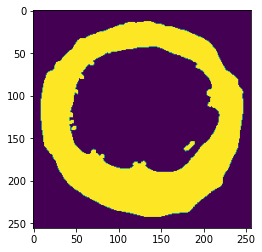

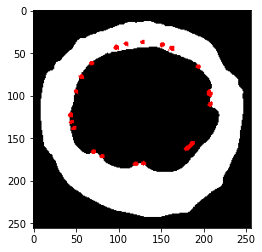

A_X.png (256, 256, 4) float32


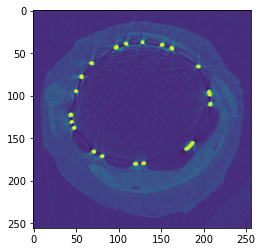

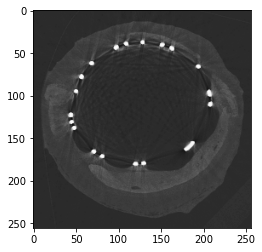

B_H.png (256, 256, 4) float32


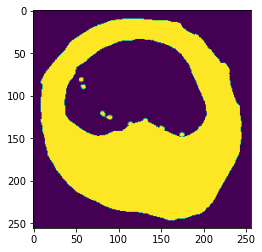

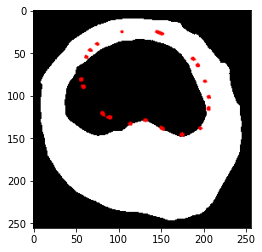

B_X.png (256, 256, 4) float32


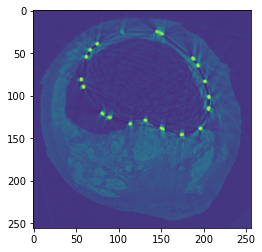

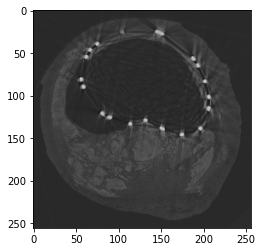

C_H.png (256, 256, 4) float32


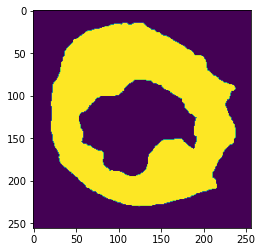

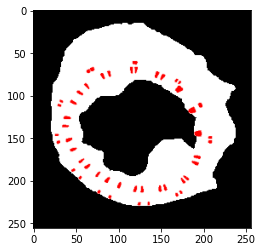

C_X.png (256, 256, 4) float32


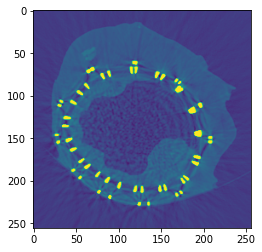

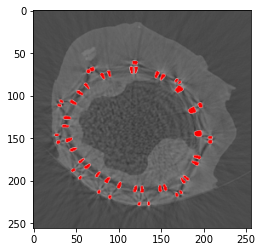

In [333]:
names = [os.path.join(path_med_data,f) for f in os.listdir(path_med_data) if f.endswith('.png')]

for image_file_path in names: 
     x =   plt.imread(image_file_path)
     print(image_file_path.split('\\')[-1], x.shape, x.dtype)
     # plt.hist(x.flatten())
     plt.imshow(x[:,:,i])
     plt.show()
     plt.imshow(x)
     plt.show()

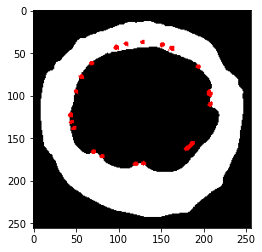

(256, 256, 3)


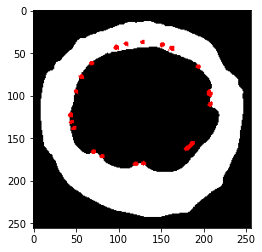

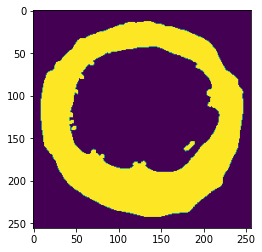

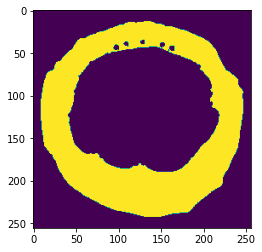

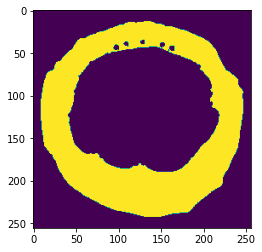

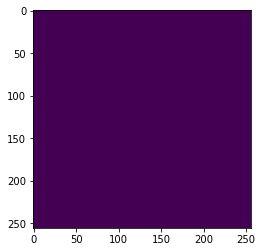

In [340]:
image_file_path = names[0]
x =   plt.imread(image_file_path)
# plt.hist(x.flatten())
plt.imshow(x)
plt.show()
plt.imshow(x[:,:,0:3])
print(x[:,:,0:3].shape)
plt.show()

for i in range(4):
     plt.imshow(x[:,:,i])
     plt.show()

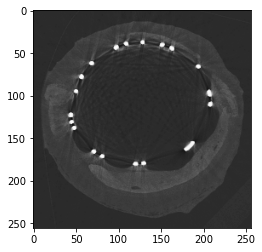

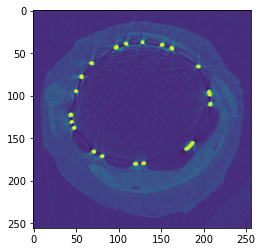

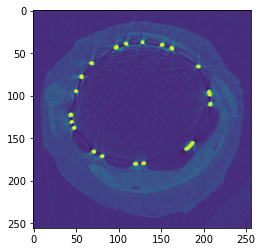

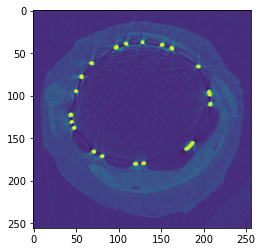

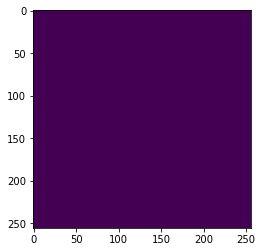

In [336]:
image_file_path = names[1]
x =   plt.imread(image_file_path)
# plt.hist(x.flatten())
plt.imshow(x)
plt.show()
for i in range(4):
     plt.imshow(x[:,:,i])
     plt.show()

In [9]:
loss = np.load(r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Results_models\tmm_1_elephant_2\tmm_1_state_train_100.npy')

Text(0.5, 1.0, 'Loss  ')

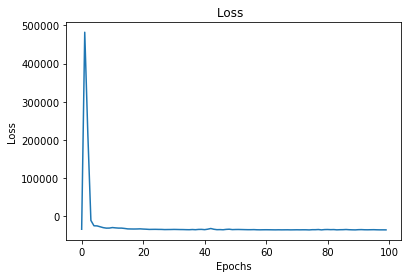

In [11]:
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss  ')